The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data=pd.read_csv("energydata_complete.csv")

In [37]:
data.head(2)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


### Attribute Information:

* date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

In [38]:
data["date"].dtype

dtype('O')

In [39]:
data["date"] = data["date"].astype('datetime64[ns]')

In [40]:
data["date"].dtype

dtype('<M8[ns]')

In [41]:
data["year"]=data.date.dt.year
data["month"]=data.date.dt.month
data["day"]=data.date.dt.day
data["hour"]=data.date.dt.hour
data["minute"]=data.date.dt.minute
data["second"]=data.date.dt.second
data["weekday_name"]=data.date.dt.weekday_name

In [42]:
data.head(1)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Tdewpoint,rv1,rv2,year,month,day,hour,minute,second,weekday_name
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,...,5.3,13.275433,13.275433,2016,1,11,17,0,0,Monday


In [43]:
data.drop(columns=["date"],inplace=True)
data.head(1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Tdewpoint,rv1,rv2,year,month,day,hour,minute,second,weekday_name
0,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,...,5.3,13.275433,13.275433,2016,1,11,17,0,0,Monday


In [44]:
data.isnull().sum()

Appliances      0
lights          0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
rv1             0
rv2             0
year            0
month           0
day             0
hour            0
minute          0
second          0
weekday_name    0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 35 columns):
Appliances      19735 non-null int64
lights          19735 non-null int64
T1              19735 non-null float64
RH_1            19735 non-null float64
T2              19735 non-null float64
RH_2            19735 non-null float64
T3              19735 non-null float64
RH_3            19735 non-null float64
T4              19735 non-null float64
RH_4            19735 non-null float64
T5              19735 non-null float64
RH_5            19735 non-null float64
T6              19735 non-null float64
RH_6            19735 non-null float64
T7              19735 non-null float64
RH_7            19735 non-null float64
T8              19735 non-null float64
RH_8            19735 non-null float64
T9              19735 non-null float64
RH_9            19735 non-null float64
T_out           19735 non-null float64
Press_mm_hg     19735 non-null float64
RH_out          19735 non-null float6

In [48]:
data["year"].value_counts()

2016    19735
Name: year, dtype: int64

In [49]:
data["month"].value_counts()

3    4464
4    4320
2    4176
5    3853
1    2922
Name: month, dtype: int64

In [50]:
import calendar
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])

In [51]:
data["month"].value_counts()

Mar    4464
Apr    4320
Feb    4176
May    3853
Jan    2922
Name: month, dtype: int64

In [53]:
data["weekday_name"].value_counts()

Thursday     2880
Wednesday    2880
Tuesday      2880
Friday       2845
Monday       2778
Sunday       2736
Saturday     2736
Name: weekday_name, dtype: int64

In [56]:
# grouping results
df = data.groupby(['month'],as_index=False).mean()
df

,month,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,day,hour,minute,second
0,Apr,98.888889,2.416667,21.856511,39.722240,20.224405,40.686375,23.018526,37.767839,21.381889,...,3.652431,36.322338,4.387639,25.057480,25.057480,2016.0,15.500000,11.500000,25.000000,0.0
1,Feb,100.945881,6.343391,21.163817,41.010174,19.924704,40.538365,21.417500,40.813789,19.894403,...,4.847821,38.762332,2.193894,25.465301,25.465301,2016.0,15.000000,11.500000,25.000000,0.0
2,Jan,97.026010,4.722793,19.945175,42.284480,19.102295,41.656070,19.876480,42.680624,18.486529,...,4.795517,39.790554,1.986071,24.664758,24.664758,2016.0,21.349076,11.622177,25.000000,0.0
3,Mar,96.953405,3.915771,21.259760,37.923927,19.141096,39.688162,21.534074,37.242069,20.277842,...,3.992832,40.116599,2.135540,24.823175,24.823175,2016.0,16.000000,11.500000,25.000000,0.0
4,May,94.199325,1.770049,23.877728,41.219759,23.253625,39.905697,25.010280,38.903170,23.771948,...,3.079419,36.939138,7.984661,24.829057,24.829057,2016.0,13.881910,11.417597,24.993512,0.0


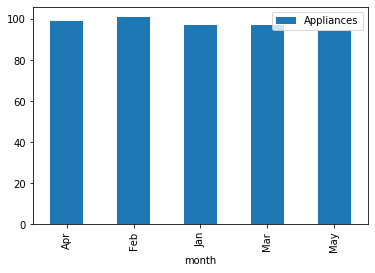

In [57]:
df.plot(kind='bar',x='month',y='Appliances')